Objectives

- Convert  object column to datetime datatype
- Set a column as a DateTimeIndex
- Check the datatype of the index for datetimeindex
- Explore the namespace provided by datetimeindex (i.e. .month, .weekday,...)
- Aggregate to another time resolution (i.e. resample)

Content to cover

- to_datetime
- set_index of a column
- resample


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Air quality data about $NO_2$ and particulate matter less than 2.5 micrometers is used, made available by [openaq](https://openaq.org) and using the [py-openaq](http://dhhagan.github.io/py-openaq/index.html) package:

- The `air_quality_no2_long.csv"` data set provides $NO_2$ values for the measurement stations _FR04014_, _BETR801_ and _London Westminster_ in respectively Paris, Antwerp and London. 

In [83]:
air_quality = pd.read_csv("../data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [84]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

## Handle time series with ease

### Using Pandas datetime properties

> I want to work with the dates in the column 'date.utc' as datetime objects instead of plain text

In [85]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Initially, the values in `datetime` are character strings and do not provide any datetime operations (e.g. extract the year, day of the week,...). By applying the `to_datetime` function, pandas interprets the strings and convert these to datetime (i.e. `datetime64[ns, UTC]`) objects. In pandas we call these datetime objects similar to `datetime.datetime` from the standard library a `Timestamp`.

<div class="alert alert-info">
    
__Note__: As many data sets do contain datetime information in one of the columns, Pandas input function like `read_csv` and `read_json` can do the transformation to dates when reading the data using the `parse_dates` parameter with a list of the columns to read as Timestamp:

    pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["date.utc"])

</div>

Why are these `Timestamp` objects useful. Let's illustrate the added value with some example cases.

> What is the start and end date of the time series data set working with?

In [86]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

Using `Timestamp` for datetimes enable us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:

In [87]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

The result is a `Timedelta` object, similar to `datetime.timedelta` from the standard Python library and defining a time duration.

__To user guide:__ The main time related concepts of Pandas are explained in :ref:`timeseries.overview`.

> I want to add a new column to the dataframe containing only the month of the measurement

In [88]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


By using `Timestamp` objects for dates, a lot of time-related properties are provided by Pandas. For example the `month`, but also `year`, `weekofyear`, `quarter`,... All of these properties are accessible by the `dt` accessor.

__To user guide:__ An overview of the existing properties is given in :ref:`timeseries.components`. More details about the `dt` accessor to return datetime like properties for the values of the Series are provided in :ref:`basics.dt_accessors`

> What is the average $NO_2$ concentration for each day of the week for each of the measurement locations?

In [112]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Remember the split-apply-combine pattern provided by `groupby` from [tutorial on statistics calculation](6_calculate_statistics.ipynb)? Here, we want to calculate a given statistic (e.g. mean $NO_2$) __for each weekday__ and __for each measurement location__. To group on weekdays, we use the datetime property `weekday` (with Monday=0 and Sunday=6) of Pandas `Timestamp`, which is also accessible by the `dt` accessor. The grouping on both locations and weekdays can be done to split the calculation of the mean on each of these combinations.

<div class="alert alert-warning">
    
__Note__: As we are working with a very short time series in these examples, the analysis does not provide a long-term representative result!

</div>

> Plot the typical $NO_2$ pattern during the day of our time series of all statiosn together. In other words, what is the average value for each hour of the day?

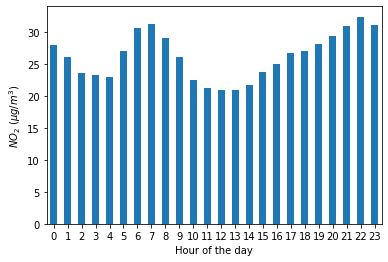

In [98]:
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0)
plt.xlabel("Hour of the day"); # xustom label for the x-axis using matplotlib
plt.ylabel("$NO_2\ (µg/m^3)$");

Similar to the previous case, we want to calculate a given statistic (e.g. mean $NO_2$) __for each hour of the day__ and we can use the split-apply-combine approach again.

### Datetime as index

In the [notebook on reshaping](7_reshape_table_layout.ipynb), `pivot` was introduced to reshape the data table with each of the measurements locations as a separate column:

In [130]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


<div class="alert alert-info">
    
__Note__: By pivoting the data, the datetime information became the index of the table. In general, setting a column as an index can be achieved by the `set_index` function. 

</div>

Working with a datetime index (i.e. `DatetimeIndex`) provides powerfull functionalities. For example, we do not need the `dt` accessor to get the time series properties, but have these properties available on the index directly:

In [135]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

Some other advantages are the convenient subsetting of time period or the adapted time scale on plots. Let's apply this on our data.

> Create a plot of the $NO_2$ values in the different stations from the 20th of May till the end of 21st of May

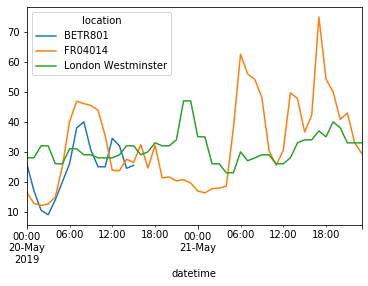

In [143]:
no_2["2019-05-20" : "2019-05-21"].plot()

By providing a __string that parses to a datetime__, a specific subset of the data can be selected on a `DatetimeIndex`.

__To user guide:__ More information on the `DatetimeIndex` and the slicing by using strings is provided in :ref:`timeseries.datetimeindex`.

### Resample a time series to another frequency

> Aggregate the current hourly time series values to the monthly maximum value in each of the stations.

In [153]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


A very powerful functionality on time series data with a datetime index, is the ability to `resample` time series to another frequency (e.g., converting secondly data into 5-minutely data). The method is similar to a groupby operation:

 - it provides a time-based grouping, by using a string (e.g. `M`, `5H`,...) that defines the target frequency 
 - it requires an aggregation function such as `mean`, `max`,...

__To user guide:__ An overview of the aliases used to define time series frequencies (alos called _offset aliases_) is given in :ref:`timeseries.offset_aliases`.

When defined, the frequency of the time series is provided by the `freq` attribute:

In [155]:
monthly_max.index.freq

<MonthEnd>

> Make a plot of the daily median $NO_2$ value in each of the stations.

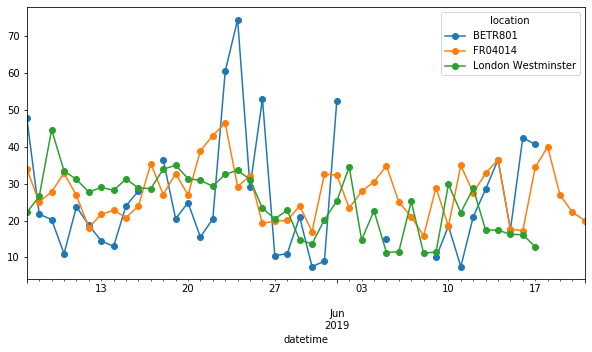

In [152]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5))

__To user guide:__ More details on the power of time series `resampling` is provided in :ref:`timeseries.resampling`.

## REMEMBER

- Valid date strings can be converted to datetime objects using `to_datetime` function or as part of read functions.
- Datetime objects in Pandas supports calculations, logical operations and convenient date-related properties 
- A `DatetimeIndex` contains these date-related properties and supports convenient slicing
- `Resample` is a powerfull functionality to change the frequency of a time series

__To user guide:__ More information on time series and date functionalities is given in :ref:`timeseries`.